In [1]:
import datetime
from datetime import date
from datetime import datetime
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
import re
import pickle
from urllib.request import urlopen
import glob
# import altair as alt
import time
import itertools
import numpy as np
import operator
from datetime import timedelta
from ipywidgets import interact, IntSlider
from IPython.display import display
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
# import seaborn as sns
# from matplotlib import pyplot as plt
# %matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

from pycaret.classification import * 

# pd.options.display.max_columns = 5000
# pd.options.display.max_rows = 5000

injured_pred = 'injured_in_1_week'

simple_features = ['Height', 'Weight', 'age','cum_injury_total', 'weeks_since_last_injury', 'Min_cum','Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

extended_features = ['Height', 'Weight', 'defender', 'attacker', 'midfielder', 'goalkeeper', 'right_foot', 'age', 'cum_injury_total', 'weeks_since_last_injury', 'Min_cum', 'Gls_cum', 'Ast_cum', 'PK_cum', 'PKatt_cum',
 'Sh_cum', 'SoT_cum', 'CrdY_cum', 'CrdR_cum', 'Touches_cum', 'Press_cum', 'Tkl_cum', 'Int_cum', 'Blocks_cum', 'xG_cum', 'npxG_cum', 'xA_cum', 'SCA_cum', 'GCA_cum', 'Cmp_cum',
 'Att_cum', 'Prog_cum', 'Carries_cum', 'Prog.1_cum', 'Succ_cum', 'Att.1_cum', 'Fls_cum', 'Fld_cum', 'Off_cum', 'Crs_cum', 'TklW_cum', 'OG_cum', 'PKwon_cum','PKcon_cum', 'Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
# Load Dataset

# Renzo's Path
# dataset = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/complete_final_df_5.csv')

# Sravan's Path
# dataset = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/dataset_for_model_final.csv')

# Sravan's Parquet Path
dataset = pd.read_parquet('dataframes_blog/dataset_for_model_final.parquet') 

In [3]:
# dataset[dataset['FBRefID']=='dea698d9'].to_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/ronaldo.csv', index=False)
dataset = dataset[dataset['drop'] == 0]
dataset = dataset[dataset['goalkeeper'] == 0]

In [4]:
# Get Train Test Split
df_train = dataset[dataset['cum_week'] <= dataset["train_split"]].dropna()
df_test = dataset[dataset['cum_week'] > dataset["train_split"]].dropna()

In [5]:
X_train = df_train[extended_features]
y_train = df_train[injured_pred]

X_test = df_test[extended_features]
y_test = df_test[injured_pred]

In [6]:
exp_clf = setup(dataset[extended_features + [injured_pred]], target=injured_pred, fix_imbalance=True, feature_selection=True, fold=2)

,Description,Value
0,session_id,2171
1,Target,injured_in_1_week
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1604775, 59)"
5,Missing Values,True
6,Numeric Features,53
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
set_config('X_train', X_train)
set_config('X_test', X_test)
set_config('y_train', y_train)
set_config('y_test', y_test)

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9715,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0950
lightgbm,Light Gradient Boosting Machine,0.9695,0.8235,0.3636,0.4559,0.4046,0.3891,0.3917,18.1450
gbc,Gradient Boosting Classifier,0.9510,0.8216,0.4405,0.2756,0.3390,0.3150,0.3244,318.8250
rf,Random Forest Classifier,0.9175,0.7371,0.3463,0.1342,0.1934,0.1588,0.1789,22.6750
ada,Ada Boost Classifier,0.9080,0.8103,0.5135,0.1579,0.2415,0.2069,0.2485,83.2500
ridge,Ridge Classifier,0.8988,0.0000,0.3060,0.0968,0.1471,0.1085,0.1291,3.7000
lda,Linear Discriminant Analysis,0.8988,0.7431,0.3060,0.0968,0.1471,0.1085,0.1292,8.9700
et,Extra Trees Classifier,0.8805,0.7201,0.3591,0.0919,0.1464,0.1058,0.1349,22.3050
svm,SVM - Linear Kernel,0.8711,0.0000,0.4320,0.1369,0.1815,0.1457,0.1805,79.3950
knn,K Neighbors Classifier,0.7923,0.6978,0.5394,0.0733,0.1291,0.0830,0.1387,718.9550


In [9]:
# df = pull()
# df.to_csv('results_1_year.csv', index=False)
df = pull().sort_values(by=['F1'], ascending=False)

In [11]:
# Select best model
model = create_model(df.index[0], fold=5)
save_model(model, 'model_1_week')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9695,0.8253,0.3644,0.4564,0.4052,0.3898,0.3924
1,0.9662,0.8228,0.3800,0.4023,0.3908,0.3735,0.3736
2,0.9715,0.8172,0.3676,0.4993,0.4234,0.4092,0.4142
3,0.9669,0.8263,0.3753,0.4113,0.3925,0.3755,0.3759
4,0.9696,0.8263,0.3635,0.4594,0.4058,0.3905,0.3933
Mean,0.9687,0.8236,0.3702,0.4457,0.4036,0.3877,0.3899
SD,0.0019,0.0034,0.0065,0.0353,0.0117,0.0128,0.0146


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_1_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
               

In [12]:
tuned_model = tune_model(model, optimize = 'F1')
save_model(tuned_model, 'model_1_week_tuned')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9716,0.8239,0.3445,0.5041,0.4093,0.3953,0.4028
1,0.9713,0.8258,0.3459,0.4957,0.4074,0.3932,0.3999
Mean,0.9715,0.8248,0.3452,0.4999,0.4084,0.3942,0.4014
SD,0.0002,0.0010,0.0007,0.0042,0.0009,0.0011,0.0015


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_1_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.3,
                                 max_depth=-1, min_child_samples=96,
            

In [16]:
model_week = load_model('model_1_week_tuned')

Transformation Pipeline and Model Successfully Loaded


In [30]:
week_final = finalize_model(tuned_model)

In [52]:
week_final

LGBMClassifier(bagging_fraction=0.7, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=140, n_jobs=-1, num_leaves=10, objective=None,
               random_state=2171, reg_alpha=0.0005, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [58]:
tuned_model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

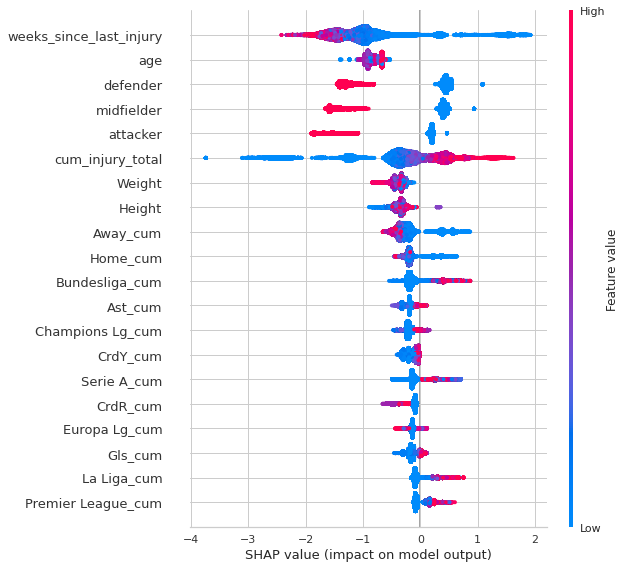

In [57]:
interpret_model(model_week[23])

In [16]:
# nan_values = y_test.isna()
# nan_columns = nan_values.any()

# columns_with_nan = y_test.columns[nan_columns].tolist()
# print(columns_with_nan)

<AxesSubplot:xlabel='injured_in_1_week', ylabel='count'>

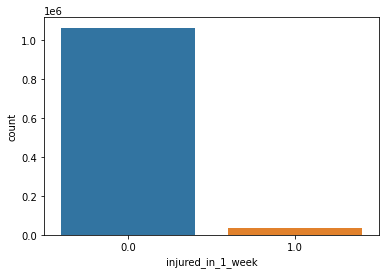

In [17]:
sns.countplot(x=injured_pred,data=df_train)

<AxesSubplot:xlabel='injured_in_1_week', ylabel='count'>

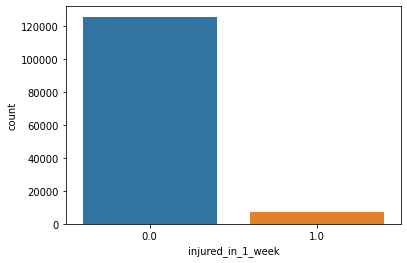

In [18]:
sns.countplot(x=injured_pred,data=df_test)

In [19]:
model_compare = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1-score', 'support'])

# Dummy Classifier

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
scoring = ["accuracy", "balanced_accuracy"]
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [21]:
# index = []
# scores = {"Accuracy": [], "Balanced accuracy": []}

In [22]:
# index += ["Dummy classifier"]
# cv_result = cross_validate(dummy_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores

In [23]:
y_pred_dummy = dummy_clf.predict(X_test)

In [24]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_dummy)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_dummy)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_dummy)}')
print(f'Recall score: {recall_score(y_test,y_pred_dummy)}')

Accuracy Score: 0.9468799010737121
Confusion Matrix: 
[[125579      0]
 [  7045      0]]
Area Under Curve: 0.5
Recall score: 0.0


In [25]:
from sklearn import metrics

def get_classification_report(y_test, y_pred, classifier):
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    df_classification_report = df_classification_report.reset_index()
    df_classification_report = df_classification_report[df_classification_report['index']=='1.0']
    df_classification_report['model'] = classifier    
    return df_classification_report[['model', 'precision', 'recall', 'f1-score', 'support']].reset_index(drop=True)

df = get_classification_report(y_test, y_pred_dummy, 'Dummy Classifier')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [26]:
model_compare = model_compare.append(df)
model_compare.head()

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.0,0.0,0.0,7045.0


# Logistic Regression (Non-Weighted)

In [27]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# index += ["Logistic regression"]
# cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores

In [29]:
y_pred_lr = lr_clf.predict(X_test)

In [31]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_lr)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lr)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_lr)}')
print(f'Recall score: {recall_score(y_test,y_pred_lr)}')

Accuracy Score: 0.9448968512486428
Confusion Matrix: 
[[125262    317]
 [  6991     54]]
Area Under Curve: 0.5025703516188811
Recall score: 0.00766501064584812


In [32]:
df = get_classification_report(y_test, y_pred_lr, 'Logistic Regression')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare.head()

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0


# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_jobs=2)

# index += ["Random forest"]
# cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores

In [34]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [35]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rf)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_rf)}')
print(f'Recall score: {recall_score(y_test,y_pred_rf)}')

Accuracy Score: 0.9483125226203402
Confusion Matrix: 
[[123857   1722]
 [  5133   1912]]
Area Under Curve: 0.6288428354722531
Recall score: 0.27139815471965933


In [36]:
df = get_classification_report(y_test, y_pred_rf, 'Random Forest')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare.head()

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0


# Balanced Logistic Regression

In [37]:
lr_clf_bal = LogisticRegression(max_iter=1000)
lr_clf_bal.set_params(class_weight="balanced")
lr_clf_bal.fit(X_train, y_train)
y_pred_lr_bal = lr_clf_bal.predict(X_test)

# index += ["Logistic regression with balanced class weights"]
# cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores

In [38]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_lr_bal)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lr_bal)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_lr_bal)}')
print(f'Recall score: {recall_score(y_test,y_pred_lr_bal)}')

Accuracy Score: 0.32146519483653035
Confusion Matrix: 
[[36097 89482]
 [  508  6537]]
Area Under Curve: 0.6076683394426173
Recall score: 0.9278921220723918


In [39]:
df = get_classification_report(y_test, y_pred_lr_bal, 'Balanced Logistic Regression')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare.head()

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0


# Balanced Random Forest

In [40]:
rf_clf_balanced = RandomForestClassifier(random_state=42, n_jobs=2)
rf_clf_balanced.set_params(class_weight="balanced")

rf_clf_balanced.fit(X_train, y_train)
y_pred_rf_bal = rf_clf_balanced.predict(X_test)

# index += ["Random forest with balanced class weights"]
# cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores

In [41]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rf_bal)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf_bal)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_rf_bal)}')
print(f'Recall score: {recall_score(y_test,y_pred_rf_bal)}')

Accuracy Score: 0.9506122572083484
Confusion Matrix: 
[[124324   1255]
 [  5295   1750]]
Area Under Curve: 0.619204706821424
Recall score: 0.248403122782115


In [42]:
df = get_classification_report(y_test, y_pred_rf_bal, 'Balanced Random Forest')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare.head()

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0


# Logistic Regression (Resample the training set during learning)

In [43]:
lr_clf_resample = make_pipeline_with_sampler(
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000),
)
lr_clf_resample.fit(X_train, y_train)
y_pred_lr_resample = lr_clf_resample.predict(X_test)

In [44]:
# index += ["Under-sampling + Logistic regression"]
# cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores


In [45]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_lr_resample)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lr_resample)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_lr_resample)}')
print(f'Recall score: {recall_score(y_test,y_pred_lr_resample)}')

Accuracy Score: 0.32366690795029557
Confusion Matrix: 
[[36398 89181]
 [  517  6528]]
Area Under Curve: 0.6082280373406901
Recall score: 0.9266146202980837


In [46]:
df = get_classification_report(y_test, y_pred_lr_resample, 'Logistic Regression (Resampled)')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare.head()

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0


# Random Forest (Resample the training set during learning)

In [47]:
rf_clf_resampled = make_pipeline_with_sampler(
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)
rf_clf_resampled.fit(X_train, y_train)
y_pred_rf_resampled = rf_clf_resampled.predict(X_test)

In [48]:
# index += ["Under-sampling + Random forest"]
# cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores

In [50]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rf_resampled)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf_resampled)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_rf_resampled)}')
print(f'Recall score: {recall_score(y_test,y_pred_rf_resampled)}')

Accuracy Score: 0.5725132705995898
Confusion Matrix: 
[[70328 55251]
 [ 1444  5601]]
Area Under Curve: 0.6775309394281006
Recall score: 0.7950319375443577


In [51]:
df = get_classification_report(y_test, y_pred_rf_resampled, 'Random Forest (Resampled)')
model_compare = model_compare.append(df).reset_index(drop=True)

In [52]:
model_compare = model_compare.drop_duplicates()
model_compare

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0
5,Logistic Regression (Resampled),0.068207,0.926615,0.127061,7045.0
6,Random Forest (Resampled),0.092043,0.795032,0.164985,7045.0


# Balanced Random Forest Classifier

In [53]:
# from imblearn.ensemble import BalancedRandomForestClassifier
# rf_clf = BalancedRandomForestClassifier(random_state=42, n_jobs=2)

In [54]:
# index += ["Balanced random forest"]
# cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
# scores["Accuracy"].append(cv_result["test_accuracy"].mean())
# scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

# df_scores = pd.DataFrame(scores, index=index)
# df_scores

In [55]:
# rf_clf.fit(X_train, y_train)
# y_pred = rf_clf.predict(X_test)

In [56]:
# # performance
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
# print(f'Recall score: {recall_score(y_test,y_pred)}')

In [57]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

In [58]:
# print(clf.coef_, clf.intercept_)

# K-Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = make_pipeline_with_sampler(
    RandomUnderSampler(random_state=42),
    KNeighborsClassifier(n_neighbors=10),
)

# clf_knn = KNeighborsClassifier(n_neighbors=5)

clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

In [60]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_knn)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_knn)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_knn)}')
print(f'Recall score: {recall_score(y_test,y_pred_knn)}')

Accuracy Score: 0.6974303293521534
Confusion Matrix: 
[[87487 38092]
 [ 2036  5009]]
Area Under Curve: 0.703834869390307
Recall score: 0.711000709723208


In [61]:
df = get_classification_report(y_test, y_pred_knn, 'K-Nearest Neighbors')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0
5,Logistic Regression (Resampled),0.068207,0.926615,0.127061,7045.0
6,Random Forest (Resampled),0.092043,0.795032,0.164985,7045.0
7,K-Nearest Neighbors,0.116215,0.711001,0.199777,7045.0


# Gradient Boosting Classifier

In [62]:
clf_gbc = make_pipeline_with_sampler(
    RandomUnderSampler(random_state=42),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
)
clf_gbc.fit(X_train, y_train)
y_pred_gbc = clf_gbc.predict(X_test)

In [63]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_gbc)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_gbc)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_gbc)}')
print(f'Recall score: {recall_score(y_test,y_pred_gbc)}')

Accuracy Score: 0.5876915188804439
Confusion Matrix: 
[[72267 53312]
 [ 1370  5675]]
Area Under Curve: 0.6905031310159419
Recall score: 0.8055358410220014


In [64]:
df = get_classification_report(y_test, y_pred_gbc, 'Gradient Boosting Classifier')
model_compare = model_compare.append(df).reset_index(drop=True)

In [65]:
model_compare

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0
5,Logistic Regression (Resampled),0.068207,0.926615,0.127061,7045.0
6,Random Forest (Resampled),0.092043,0.795032,0.164985,7045.0
7,K-Nearest Neighbors,0.116215,0.711001,0.199777,7045.0
8,Gradient Boosting Classifier,0.096208,0.805536,0.171886,7045.0


# Support Vector Machine

In [66]:
from sklearn.svm import SVC

clf_svc = make_pipeline_with_sampler(
    RandomUnderSampler(random_state=42),
    SVC(gamma='auto'),
)

clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

In [67]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_svc)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_svc)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_svc)}')
print(f'Recall score: {recall_score(y_test,y_pred_svc)}')

Accuracy Score: 0.9195922306671492
Confusion Matrix: 
[[119459   6120]
 [  4544   2501]]
Area Under Curve: 0.653134642860883
Recall score: 0.3550035486160397


In [68]:
df = get_classification_report(y_test, y_pred_svc, 'Support Vector Machine')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0
5,Logistic Regression (Resampled),0.068207,0.926615,0.127061,7045.0
6,Random Forest (Resampled),0.092043,0.795032,0.164985,7045.0
7,K-Nearest Neighbors,0.116215,0.711001,0.199777,7045.0
8,Gradient Boosting Classifier,0.096208,0.805536,0.171886,7045.0
9,Support Vector Machine,0.290106,0.355004,0.319290,7045.0


# Multilayer Perceptron

In [69]:
from sklearn.neural_network import MLPClassifier

clf_mlp = make_pipeline_with_sampler(
    RandomUnderSampler(random_state=42),
    MLPClassifier(random_state=1, max_iter=300),
)

clf_mlp.fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)

In [70]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_mlp)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_mlp)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_mlp)}')
print(f'Recall score: {recall_score(y_test,y_pred_mlp)}')

Accuracy Score: 0.2177358547472554
Confusion Matrix: 
[[ 22189 103390]
 [   357   6688]]
Area Under Curve: 0.5630096592017995
Recall score: 0.9493257629524485


In [71]:
df = get_classification_report(y_test, y_pred_mlp, 'Multilayer Perceptron')
model_compare = model_compare.append(df).reset_index(drop=True)
model_compare

,model,precision,recall,f1-score,support
0,Dummy Classifier,0.000000,0.000000,0.000000,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0
2,Random Forest,0.526142,0.271398,0.358086,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0
5,Logistic Regression (Resampled),0.068207,0.926615,0.127061,7045.0
6,Random Forest (Resampled),0.092043,0.795032,0.164985,7045.0
7,K-Nearest Neighbors,0.116215,0.711001,0.199777,7045.0
8,Gradient Boosting Classifier,0.096208,0.805536,0.171886,7045.0
9,Support Vector Machine,0.290106,0.355004,0.319290,7045.0


# Weighted Logistic Regression

In [72]:
# define class weights
# w = {0:1, 1:19}

# define model
# lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
# lg2.fit(X_train,y_train)
# test
# y_pred = lg2.predict(X_test)

# performance
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
# print(f'Recall score: {recall_score(y_test,y_pred)}')

In [73]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

# Weights GridSearch

In [74]:
# define weight hyperparameter
# w = [{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:15}, {0:1, 1:20}]
# hyperparam_grid = {"class_weight": w }

In [75]:
# define model
# lg3 = LogisticRegression(random_state=13)
# # define evaluation procedure
# grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
# grid.fit(X_train,y_train)
# print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [86]:
model_compare.sort_values(by=['f1-score'], ascending=False)

,model,precision,recall,f1-score,support
2,Random Forest,0.526142,0.271398,0.358086,7045.0
4,Balanced Random Forest,0.582363,0.248403,0.348259,7045.0
9,Support Vector Machine,0.290106,0.355004,0.319290,7045.0
7,K-Nearest Neighbors,0.116215,0.711001,0.199777,7045.0
8,Gradient Boosting Classifier,0.096208,0.805536,0.171886,7045.0
6,Random Forest (Resampled),0.092043,0.795032,0.164985,7045.0
5,Logistic Regression (Resampled),0.068207,0.926615,0.127061,7045.0
3,Balanced Logistic Regression,0.068080,0.927892,0.126853,7045.0
10,Multilayer Perceptron,0.060757,0.949326,0.114205,7045.0
1,Logistic Regression,0.145553,0.007665,0.014563,7045.0


In [93]:
# dataset[dataset['weeks_since_injury'] < 0]
dataset[(dataset['FBRefID'] == 'dea698d9')].to_csv('ronaldo.csv')